**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
#loading packages and plot figure layout
import pandas as pd
from IPython.display import display
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import optimize

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
def utility_function(L, w, tau, G, kappa, alpha, nu):
    C = kappa + (1 - tau) * w * L
    return np.log(C**alpha * G**(1 - alpha)) - nu * (L**2 / 2)

def optimal_labor_choice(w, tau, G, kappa, alpha, nu):
    # Define the objective function to maximize (it is negative due to python only can minimize i think)
    objective = lambda L: -utility_function(L, w, tau, G, kappa, alpha, nu)

    # Set the bounds for labor supply (L) between 0 and 24
    possible_hours = (0, 24)

 # Provide an initial guess for L 
    initial_guess = 10

    # Use numerical optimization to find the maximum of the utility function
    result = minimize(objective, x0=initial_guess, bounds=[possible_hours])

    return result.x

# Parameters
w = 1.0  # Real wage
tau = 0.3  # Labor-income tax rate
kappa = 1.0  # Free private consumption component
alpha = 0.5  # Weight for private consumption
nu = 1 / (2*16**2)  # Disutility of labor scaling factor

# Values of G to test
G_values = [1.0, 2.0]

for G in G_values:

    # Calculate optimal labor supply choice
    L_star = optimal_labor_choice(w, tau, G, kappa, alpha, nu)

    print(f"Optimal labor supply choice for G={G}: L_star = {L_star}")

Optimal labor supply choice for G=1.0: L_star = [15.30161224]
Optimal labor supply choice for G=2.0: L_star = [15.30161772]


In [4]:
# Parameters
w = 1.0  # Real wage
tau = 0.3  # Labor-income tax rate
kappa = 1.0  # Free private consumption component
alpha = 0.5  # Weight for private consumption
nu = 1 / (2*(16**2))  # Disutility of labor scaling factor

# Values of G to test
G_values = [1.0, 2.0] 

for G in G_values:
    # Calculate tilde_w
    tilde_w = (1 - tau) * w

    # Calculate L_star using the formula
    L_star_formula = (-kappa + (kappa**2 + 4 * (alpha / nu) * tilde_w**2)**(1/2)) / (2 * tilde_w)

    # Calculate L_star using the numerical optimization
    L_star_optimization = optimal_labor_choice(tilde_w, tau, G, kappa, alpha, nu)

    # Compare the values
    if np.isclose(L_star_formula, L_star_optimization):
        print(f"The calculated L_star ({L_star_formula}) is equal to the optimal labor supply choice for G={G} obtained from the optimization.")
    else:
        print(f"The calculated L_star ({L_star_formula}) is NOT equal to the optimal labor supply choice for G={G} obtained from the optimization.")


The calculated L_star (15.30165022719559) is NOT equal to the optimal labor supply choice for G=1.0 obtained from the optimization.
The calculated L_star (15.30165022719559) is NOT equal to the optimal labor supply choice for G=2.0 obtained from the optimization.


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

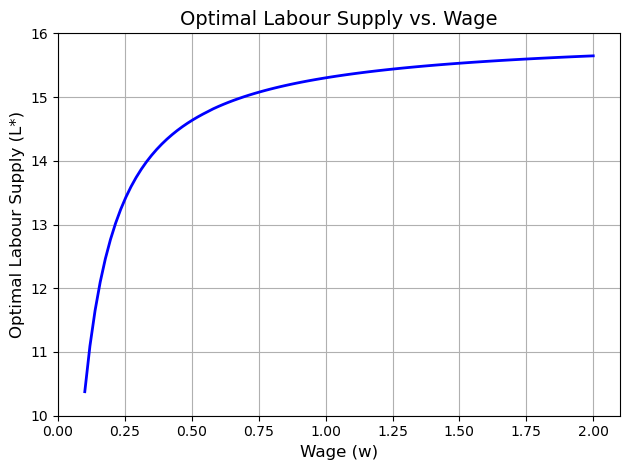

In [5]:
# Range of wage values
wage_values = np.linspace(0.1, 2.0, 100)

# Calculate optimal labor supply for each wage value
optimal_labor_values = [optimal_labor_choice(w, tau, G, kappa, alpha, nu) for w in wage_values]

# Plotting the results
plt.plot(wage_values, optimal_labor_values, color='blue', linewidth=2)
plt.xlabel('Wage (w)', fontsize=12)
plt.ylabel('Optimal Labour Supply (L*)', fontsize=12)
plt.title('Optimal Labour Supply vs. Wage', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(10, 16)
plt.xlim(0, 2.1)
plt.tight_layout()
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


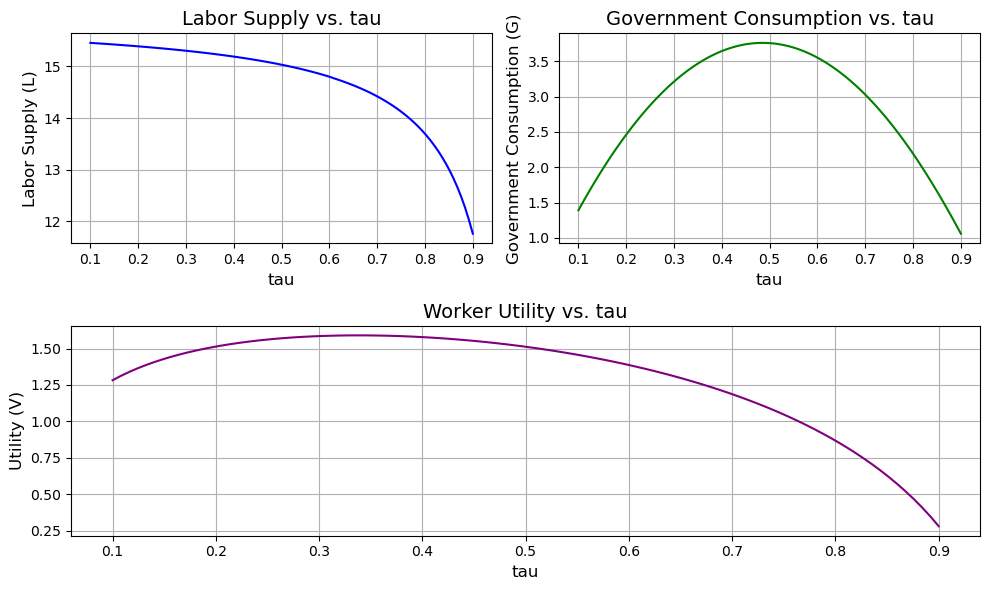

In [6]:
# Grid of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Initialize arrays to store the results
L_values = np.zeros_like(tau_values)
G_values = np.zeros_like(tau_values)
utility_values = np.zeros_like(tau_values)

# Calculate L, G, and utility for each tau value
for i, tau in enumerate(tau_values):

    # Calculate optimal labor supply choice (L*)
    L_star = optimal_labor_choice(w, tau, G, kappa, alpha, nu)

    # Calculate government consumption (G)
    G = tau * w * L_star * ((1 - tau)*w)

    # Calculate utility (V)
    utility = utility_function(L_star, w, tau, G, kappa, alpha, nu)

    # Store the values in the arrays
    L_values[i] = L_star
    G_values[i] = G
    utility_values[i] = utility

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot of L vs. tau
plt.subplot(2, 2, 1)
plt.plot(tau_values, L_values, color='blue')
plt.xlabel('tau', fontsize=12)
plt.ylabel('Labor Supply (L)', fontsize=12)
plt.title('Labor Supply vs. tau', fontsize=14)
plt.grid(True)

# Plot of G vs. tau
plt.subplot(2, 2, 2)
plt.plot(tau_values, G_values, color='green')
plt.xlabel('tau', fontsize=12)
plt.ylabel('Government Consumption (G)', fontsize=12)
plt.title('Government Consumption vs. tau', fontsize=14)
plt.grid(True)

# Plot of utility vs. tau
plt.subplot(2, 1, 2)
plt.plot(tau_values, utility_values, color='purple')
plt.xlabel('tau', fontsize=12)
plt.ylabel('Utility (V)', fontsize=12)
plt.title('Worker Utility vs. tau', fontsize=14)
plt.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The socially optimal tax level τ* = [0.34663837]. As shown below, the socially optimal tax rate, is the top point of Worker utility vs Tau.


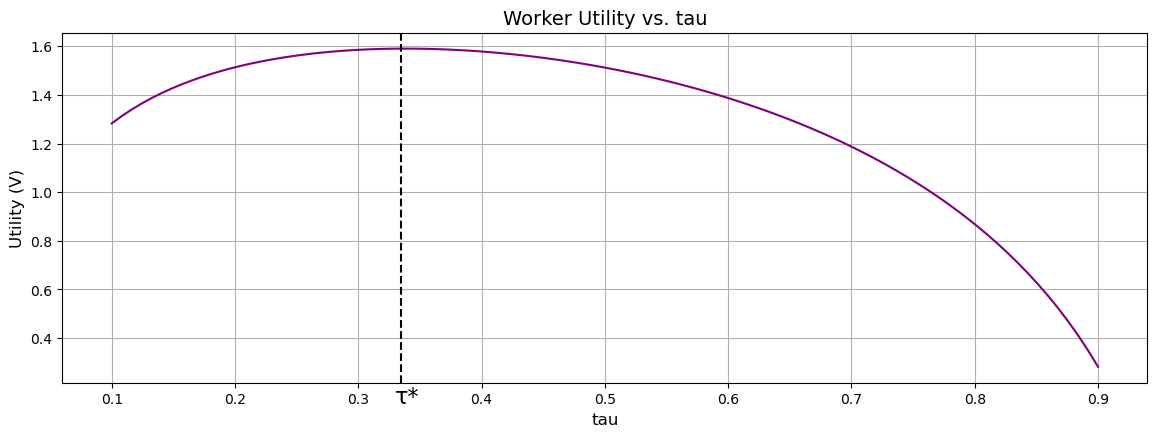

In [7]:
def new_utility_function(L_star, w, tau, kappa, alpha, nu):
    G = tau * w * L_star * ((1 - tau)*w)
    C = kappa + (1 - tau) * w * L_star
    return np.log(C**alpha * G**(1 - alpha)) - nu * (L_star**2 / 2)

def new_optimal_labor_choice(w, kappa, alpha, nu):
    # Define the objective function to maximize (it is negative due to python only can minimize i think)
    objective_tau = lambda tau: -new_utility_function(L_star, w, tau, kappa, alpha, nu)
    # Set the bounds for labor supply (L) between 0 and 24
    possible_tax = (0, 1)

 # Provide an initial guess for L 
    initial_guess = 0.3

    # Use numerical optimization to find the maximum of the utility function
    result_tau = minimize(objective_tau, x0=initial_guess, bounds=[possible_tax])

    return result_tau.x

tau_star = new_optimal_labor_choice(w, kappa, alpha, nu)
print(f"The socially optimal tax level τ* = {tau_star}. As shown below, the socially optimal tax rate, is the top point of Worker utility vs Tau.")


# Grid of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Initialize array to store utility values
utility_values = np.zeros_like(tau_values)

# Calculate utility for each tau value
for i, tau in enumerate(tau_values):
    # Calculate optimal labor supply choice (L*)
    L_star = optimal_labor_choice(w, tau, G, kappa, alpha, nu)

    # Calculate government consumption (G)
    G = tau * w * L_star * ((1 - tau)*w)

    # Calculate utility (V)
    utility = utility_function(L_star, w, tau, G, kappa, alpha, nu)

    # Store the utility value
    utility_values[i] = utility

# Find the index of the maximum utility
max_utility_index = np.argmax(utility_values)
max_utility_tau = tau_values[max_utility_index]
max_utility_value = utility_values[max_utility_index]

# Plotting the results
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 2)
plt.plot(tau_values, utility_values, color='purple')
plt.xlabel('tau', fontsize=12)
plt.ylabel('Utility (V)', fontsize=12)
plt.title('Worker Utility vs. tau', fontsize=14)
plt.grid(True)

# Add a vertical line at the top point
plt.axvline(x=max_utility_tau, color='black', linestyle='--')
plt.annotate('τ*', xy=(max_utility_tau, max_utility_value), xytext=(max_utility_tau - 0.005, max_utility_value - 1.46), color='black', fontsize=16)

# Show the plot
plt.show()



A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [8]:
def arbejds_problem(L, G, tau, w, kappa, alpha, nu, sigma, rho, epsilon):
    C = kappa + (1 - tau)* w * L
    return (((alpha * (kappa + (1 - tau_star) * w * L) ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (sigma - 1))) ** (1 - rho) - 1) / (1 - rho) - nu * (L ** (1 + epsilon)) / (1 + epsilon)

def optimal_arbejde(G, tau, w, kappa, alpha, nu, sigma, rho, epsilon):
    objective = lambda L: -arbejds_problem(L, G, tau, w, kappa, alpha, nu, sigma, rho, epsilon)

    # Set the bounds for labor supply (L) between 0 and 24
    possible_hours = (0, 24)

    # Provide an initial guess for L
    initial_guess = 10

    resultat = minimize(objective, x0=initial_guess, bounds=[possible_hours])

    return resultat.x

tau = tau_star
w = 1
kappa = 1
alpha = 0.5
nu = 1 / (2 * 16**2)

# Parameters for Set 1
sigma = 1.001
rho = 1.001
epsilon = 1.0

# Parameters for Set 2
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0


# Solve for optimal labor supply using the worker problem for Set 1
L_set1 = optimal_arbejde(G, tau, w, kappa, alpha, nu, sigma, rho, epsilon)

# Calculate G for Set 1
G_set1 = tau * w * L_set1

# Solve for optimal labor supply using the worker problem for Set 2
L_set2 = optimal_arbejde(G, tau, w, kappa, alpha, nu, sigma2, rho2, epsilon2)

# Calculate G for Set 2
G_set2 = tau * w * L_set2

print(f"For Set 1: G = {G_set1}")
print(f"For Set 2: G = {G_set2}")


For Set 1: G = [5.2869706]
For Set 2: G = [4.35657331]


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [9]:
L_star = optimal_arbejde(G, tau, w, kappa, alpha, nu, sigma, rho, epsilon)
w = 1
kappa = 1
alpha = 0.5
nu = 1 / (2 * 16**2)

def ny_arbejds_problem(L_star, tau, w, kappa, alpha, nu, sigma, rho, epsilon):
    G = tau * w * L_star * ((1 - tau)*w)
    C = kappa + (1 - tau)* w * L_star
    return (((alpha * (kappa + (1 - tau) * w * L_star) ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (sigma - 1))) ** (1 - rho) - 1) / (1 - rho) - nu * (L_star ** (1 + epsilon)) / (1 + epsilon)

def ny_tau_optimal(G, L_star, w, kappa, alpha, nu, sigma, rho, epsilon):
    objective = lambda tau: -ny_arbejds_problem(L_star, tau, w, kappa, alpha, nu, sigma, rho, epsilon)
    possible_tax = (0,1)
    initial_guess = 0.3
    result_tau = minimize(objective, x0=initial_guess, bounds=[possible_tax])
    return result_tau.x

# Parameters for Set 1
sigma = 1.001
rho = 1.001
epsilon = 1.0

# Parameters for Set 2
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

tau_star = ny_tau_optimal(G, L_star, w, kappa, alpha, nu, sigma, rho, epsilon)
tau_star2 = ny_tau_optimal(G, L_star, w, kappa, alpha, nu, sigma2, rho2, epsilon2)

print(f"Set 1: tau_star = {tau_star}")
print(f"Set 2: tau_star = {tau_star2}")


Set 1: tau_star = [0.34361798]
Set 2: tau_star = [0.29237632]


In [10]:
L_star = optimal_arbejde(G, tau, w, kappa, alpha, nu, sigma, rho, epsilon)
w = 1
kappa = 1
alpha = 0.5
nu = 1 / (2 * 16**2) 

def ny_arbejds_problem(L_star, tau, w, kappa, alpha, nu, sigma, rho, epsilon):
    G = tau * w * L_star * ((1 - tau)*w)
    C = kappa + (1 - tau)* w * L_star
    return (((alpha * (kappa + (1 - tau) * w * L_star) ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (sigma - 1))) ** (1 - rho) - 1) / (1 - rho) - nu * (L_star ** (1 + epsilon)) / (1 + epsilon)

def ny_tau_optimal(G, L_star, w, kappa, alpha, nu, sigma, rho, epsilon):
    objective = lambda tau: -ny_arbejds_problem(L_star, tau, w, kappa, alpha, nu, sigma, rho, epsilon)
    possible_tax = (0,1)
    initial_guess = 0.3
    result_tau = minimize(objective, x0=initial_guess, bounds=[possible_tax])
    return result_tau.x

# List of parameter sets
parameter_sets = [
    {"sigma": 1.001, "rho": 1.001, "epsilon": 1.0},
    {"sigma": 1.5, "rho": 1.5, "epsilon": 1.0}
]

# Perform calculations for each parameter set
for i, params in enumerate(parameter_sets):
    sigma = params["sigma"]
    rho = params["rho"]
    epsilon = params["epsilon"]

    tau_star = ny_tau_optimal(G, L_star, w, kappa, alpha, nu, sigma, rho, epsilon)
    print(f"Set {i+1}: tau_star = {tau_star}")


Set 1: tau_star = [0.3436112]
Set 2: tau_star = [0.29237403]


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [11]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [12]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [13]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [14]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [15]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [16]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Optimal solution:
x1 = -0.0000
x2 = -0.0000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

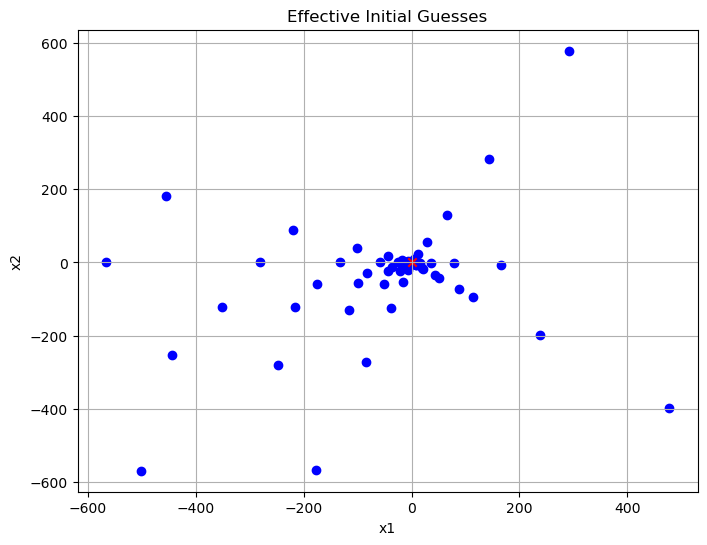

In [47]:
from Examproblem import refined_global_optimizer, generate_effective_initial_guesses

# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Run the refined global optimizer
x_star = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Print the optimal solution
print("Optimal solution:")
print(f"x1 = {x_star[0]:.4f}")
print(f"x2 = {x_star[1]:.4f}")

# Generate effective initial guesses
effective_initial_guesses = generate_effective_initial_guesses(bounds, warmup_iterations, max_iterations, x_star)

# Plotting the effective initial guesses
# Plotting the effective initial guesses
plt.figure(figsize=(8, 6))
plt.scatter(effective_initial_guesses[:, 0], effective_initial_guesses[:, 1], c='b', marker='o')
plt.scatter(x_star[0], x_star[1], c='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses')
plt.grid(True)
plt.plot

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Optimal solution:
x1 = -0.0000
x2 = -0.0000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

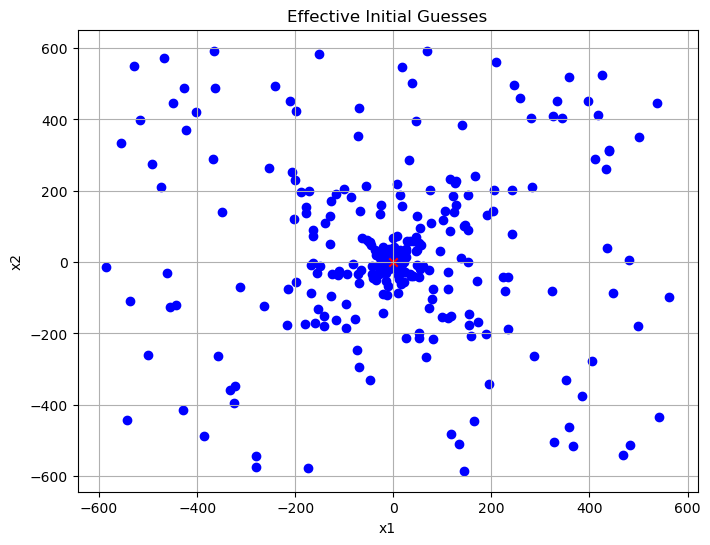

In [48]:
from Examproblem import refined_global_optimizer, generate_effective_initial_guesses

# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations = 100
max_iterations = 1000

# Run the refined global optimizer
x_star = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Print the optimal solution
print("Optimal solution:")
print(f"x1 = {x_star[0]:.4f}")
print(f"x2 = {x_star[1]:.4f}")

# Generate effective initial guesses
effective_initial_guesses = generate_effective_initial_guesses(bounds, warmup_iterations, max_iterations, x_star)

# Plotting the effective initial guesses
# Plotting the effective initial guesses
plt.figure(figsize=(8, 6))
plt.scatter(effective_initial_guesses[:, 0], effective_initial_guesses[:, 1], c='b', marker='o')
plt.scatter(x_star[0], x_star[1], c='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses')
plt.grid(True)
plt.plot

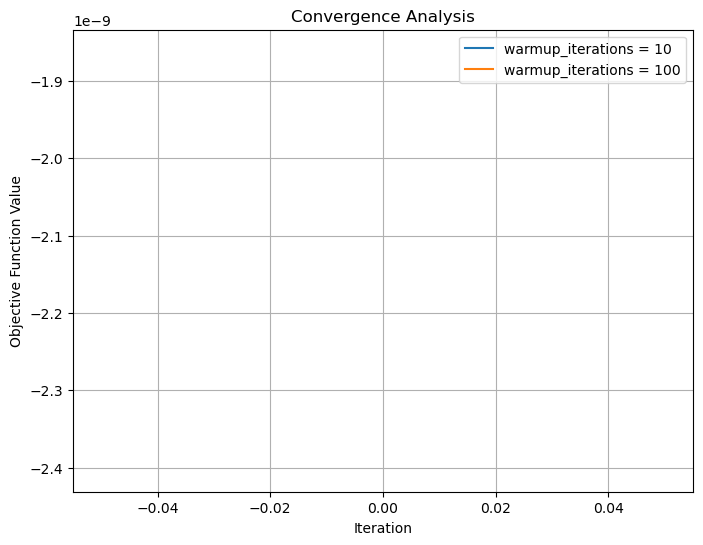

In [49]:
from Examproblem import refined_global_optimizer
# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations_10 = 10
warmup_iterations_100 = 100
max_iterations = 1000

# Run the refined global optimizer with different values of warmup_iterations
x_star_10, objective_values_10 = refined_global_optimizer(bounds, tolerance, warmup_iterations_10, max_iterations)
x_star_100, objective_values_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)

# Plotting the objective function values
plt.figure(figsize=(8, 6))
plt.plot(objective_values_10, label='warmup_iterations = 10')
plt.plot(objective_values_100, label='warmup_iterations = 100')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True)
plt.show()

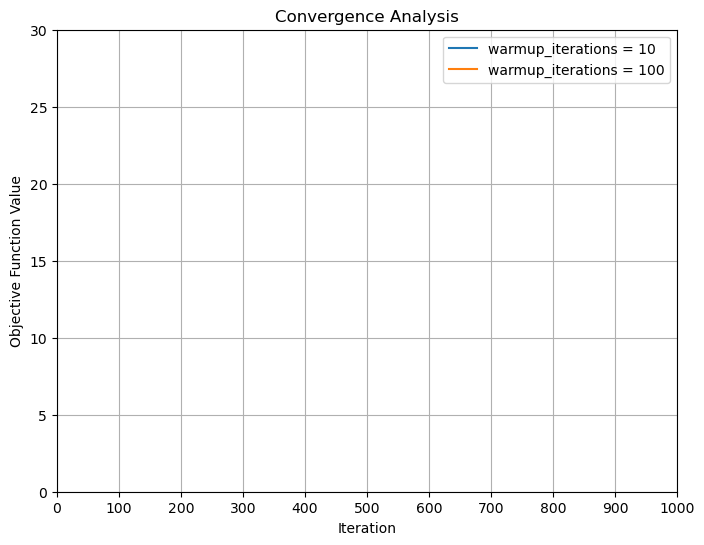

In [44]:
# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations_10 = 10
warmup_iterations_100 = 100
max_iterations = 1000

# Run the refined global optimizer with different values of warmup_iterations
x_star_10, objective_values_10 = refined_global_optimizer(bounds, tolerance, warmup_iterations_10, max_iterations)
x_star_100, objective_values_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)


# Plotting the objective function values
plt.figure(figsize=(8, 6))
plt.plot(x_star_10, label='warmup_iterations = 10')
plt.plot(x_star_100, label='warmup_iterations = 100')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True)
plt.xlim(0, 600)  # Set the x-axis range
plt.ylim(0, 30)  # Set the y-axis range
plt.xticks(np.arange(0, max_iterations+1, 100))  # Set the x-axis tick locations
plt.yticks(np.arange(0, 31, 5))  # Set the y-axis tick locations
plt.show()


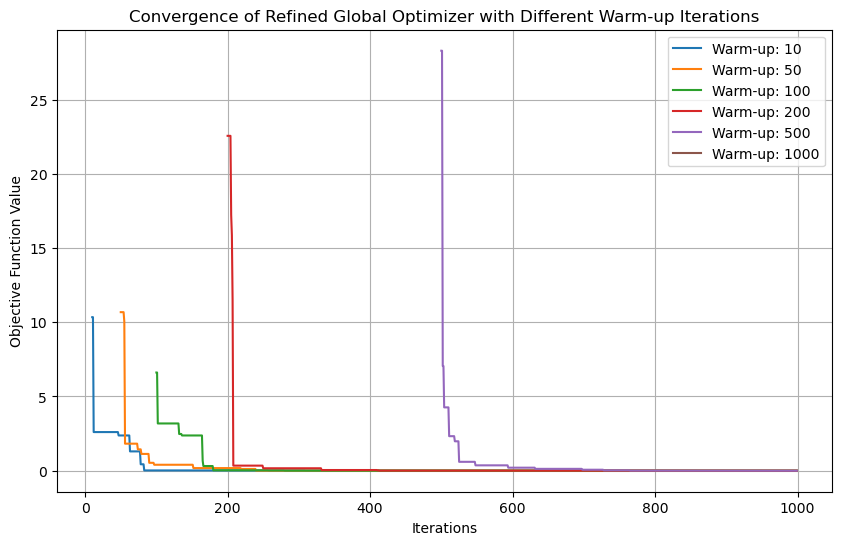

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Griewank)
def griewank(x):
    n = len(x)
    sum_term = np.sum(x**2 / 4000)
    prod_term = np.prod(np.cos(x / np.sqrt(np.arange(1, n + 1))))
    return sum_term - prod_term + 1

# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
max_iterations = 1000

# Number of warm-up iterations to test
warmup_iterations = [10, 50, 100, 200, 500, 1000]

# Store the objective function values for each warm-up iteration
objective_values = []

# Run the refined global optimizer for each warm-up iteration
for warmup in warmup_iterations:
    # Refined global optimizer with multi-start
    x_star = np.zeros(len(bounds))  # Initialize x_star as a zero vector
    f_star = np.inf
    objective_history = []  # Store objective function values for each iteration

    for k in range(max_iterations):
        # Step 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[:, 0], bounds[:, 1])

        if k >= warmup:
            # Step 3.C: Calculate chi^k
            chi_k = 0.5 * 2 / (1 + np.exp((k - warmup) / 100))

            # Step 3.D: Calculate x_k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

            # Step 3.E: Run optimizer with x_k0 as initial guess
            res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
            x_k_star = res.x
            f_k_star = res.fun

            # Step 3.F: Update x_star and f_star
            if k == warmup or f_k_star < f_star:
                x_star = x_k_star
                f_star = f_k_star

        # Step 3.G: Store the objective function value for the current iteration
        objective_history.append(f_star)

    objective_values.append(objective_history)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, warmup in enumerate(warmup_iterations):
    plt.plot(range(max_iterations), objective_values[i], label=f'Warm-up: {warmup}')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Convergence of Refined Global Optimizer with Different Warm-up Iterations')
plt.legend()
plt.grid(True)
plt.show()
